## Welcome to the Browser Wars (1995 - )
<p><img src="https://assets.datacamp.com/production/project_1172/img/browser.png" alt="Browser on desktop, tablet, and phone"></p>
<p>In the mid 1990s, the First Browser War began with Netscape Navigator and Microsoft Internet Explorer fighting for dominance. By 2001, Internet Explorer was the clear winner, but it was not long before the Second Browser Wars began (2004-2017). This coincided with the rise of smartphones, which emphasized the need and competitiveness for more mobile-friendly versions of browsers. <a href="https://en.wikipedia.org/wiki/Browser_wars">[1]</a></p>
<p>In this notebook, we'll analyze the worldwide popularity of browsers over time using Google Trends. Although this won't give us direct market share figures, we can use Google Trends to get a sense of interest of a given browser over time and how that interest compares to other browsers. In particular, we will be looking at five major players over the past two decades: Mozilla Firefox (2002-), Apple's Safari (2002-), Google Chrome (2008-), Microsoft Internet Explorer (1995-2020), and Opera (1995-).</p>
<p>The dataset you will use was downloaded as a CSV from this <a href="https://trends.google.com/trends/explore?date=all&q=%2Fm%2F01dyhm,%2Fm%2F0168s_,%2Fm%2F04j7cyf,%2Fm%2F03xw0,%2Fm%2F01z7gs">Google Trends query</a> in mid-October of 2020. Here are the details:</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/worldwide_browser_trends.csv</b></div>
This is a time series indexed by month with the search interest for each browser.
<ul>
    <li><b>Month:</b> each month from 2004-01 to 2020-10</li>
    <li><b>Firefox:</b> search interest for Firefox</li>
    <li><b>Safari:</b> search interest for Safari</li>
    <li><b>Google Chrome:</b> search interest for Chrome</li>
    <li><b>Internet Explorer:</b> search interest for Internet Explorer</li>
    <li><b>Opera:</b> search interest for Opera</li>
</ul>
</div>
<p>Google defines the values of search interest as:</p>
<blockquote>
  <p>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</p>
</blockquote>
<p>Best of luck and may the best browser win!</p>

In [38]:
# import and preview data

import pandas as pd

browser_trends = pd.read_csv('datasets/worldwide_browser_trends.csv')

print('# rows = {}\n# cols = {}\n\n{}'.format(browser_trends.shape[0],browser_trends.shape[1],browser_trends.head()))

# rows = 202
# cols = 6

     Month  Firefox  Safari  Google Chrome  Internet Explorer  Opera
0  2004-01       12       2              2                 37      9
1  2004-02       20       2              2                 39      9
2  2004-03       18       2              2                 34      8
3  2004-04       20       2              2                 33      9
4  2004-05       20       2              2                 35      9


In [39]:
# rolling average

browser_trends.set_index('Month', inplace=True)

rolling_six = browser_trends.rolling(6).mean()

print(rolling_six.head(10))

           Firefox  Safari  Google Chrome  Internet Explorer     Opera
Month                                                                 
2004-01        NaN     NaN            NaN                NaN       NaN
2004-02        NaN     NaN            NaN                NaN       NaN
2004-03        NaN     NaN            NaN                NaN       NaN
2004-04        NaN     NaN            NaN                NaN       NaN
2004-05        NaN     NaN            NaN                NaN       NaN
2004-06  19.833333     2.0       1.833333          35.500000  9.000000
2004-07  24.666667     2.0       1.833333          35.166667  9.333333
2004-08  26.833333     2.0       1.833333          34.166667  9.333333
2004-09  31.166667     2.0       1.833333          33.833333  9.500000
2004-10  35.333333     2.0       1.666667          33.666667  9.500000


In [40]:
# % change from the previous quarter

pct_change_quarterly = browser_trends.pct_change(periods = 3)*100

pct_change_quarterly = pct_change_quarterly.loc['2009-01':]
pct_change_quarterly.head(10)

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2009-01,4.545455,25.000000,0.000000,9.090909,0.000000
2009-02,-1.515152,20.000000,0.000000,9.090909,-9.090909
2009-03,-7.042254,40.000000,-13.333333,20.000000,-8.333333
2009-04,-7.246377,0.000000,23.076923,20.833333,-9.090909
2009-05,-6.153846,-16.666667,25.000000,8.333333,0.000000
2009-06,-6.060606,0.000000,15.384615,-16.666667,-9.090909
2009-07,14.062500,20.000000,12.500000,-6.896552,0.000000
2009-08,18.032787,0.000000,20.000000,0.000000,10.000000
2009-09,8.064516,-14.285714,33.333333,-4.000000,30.000000


In [67]:
chrome_trends = pd.DataFrame()

browser_trends.index = pd.to_datetime(browser_trends.index, format='%Y%m')

for year in ['2009','2012','2015','2018']:
    temp_df = browser_trends.loc[year, ['Google Chrome']].reset_index(drop=True)
    temp_df.rename(columns={'Google Chrome':year}, inplace=True)
    chrome_trends = pd.concat([chrome_trends, temp_df], axis=1)
    
print(chrome_trends)

    2009  2012  2015  2018
0     13    52    48    24
1     12    50    45    24
2     13    47    42    24
3     16    47    47    22
4     15    48    46    23
5     15    45    43    22
6     18    51    44    20
7     18    53    43    21
8     20    50    41    25
9     21    48    40    23
10    24    48    38    22
11    29    48    37    22


<AxesSubplot:title={'center':'Chrome Search Performance in 2009, 2012, 2015 & 2018'}>

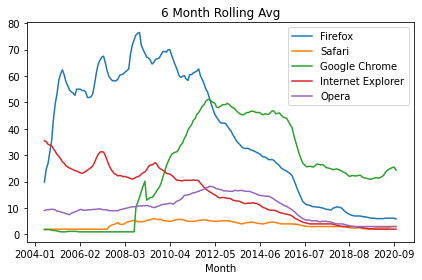

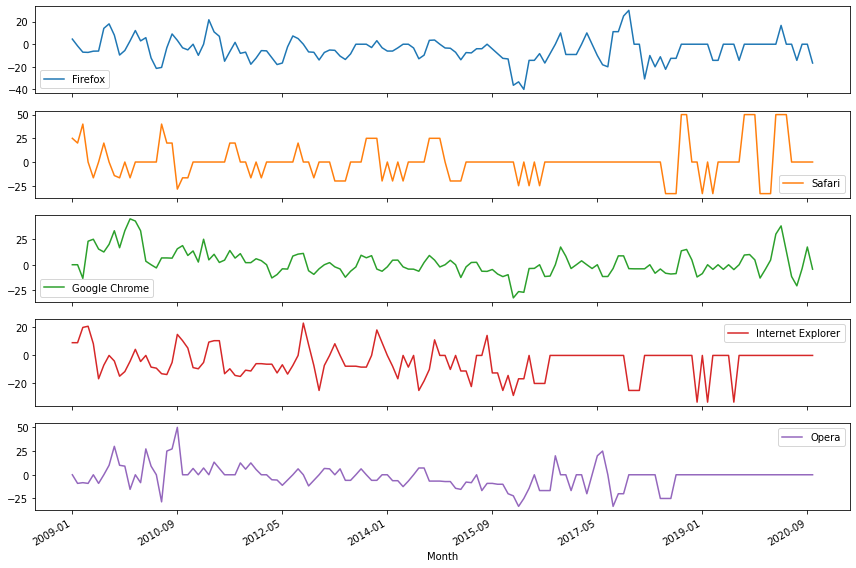

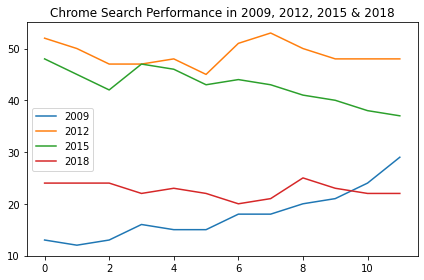

In [68]:
rolling_six.plot(title="6 Month Rolling Avg")
pct_change_quarterly.plot(subplots=True, figsize=(12,8))
chrome_trends.plot(title="Chrome Search Performance in 2009, 2012, 2015 & 2018")